In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import gridspec
import h5py

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.handlelength']=2
mpl.rcParams['legend.fontsize']=16
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
mpl.rcParams['legend.labelspacing'] = 0.1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.direction'] = 'inout'

In [2]:
tbounce=.377756172723849759
tolerance = 0.07e2
k_b = 1.3806488e-16 # erg/K                                                                                                                                                                              
c = 2.99e10         # cm/s                                                                                                                                                                               
h = 6.62606957e-27  # erg/Hz                                                                                                                                                                             
pi = 3.14159265359
k_MeV = 1.16046e10
erg_to_MeV = 624151
MeV_to_erg = 1 / erg_to_MeV # erg  
t_GR_shift=7738846.373720614
timeOffset = (7278367976.5-50e5+t_GR_shift) / 29979245800 

splitTime = 600
timeBinWidths = [0.01, 0.01] # ms  

tend = 0.9146844-tbounce
print(tend)

styles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1, 1, 1))]
marks = ['x', '+', '1', '*', '2']
colours1 = ['xkcd:sky blue', 'xkcd:orange', 'xkcd:green', 'xkcd:wine red', 'xkcd:lavender']
colours2 = ['C0','C1','C2','C3','C4']
labels = ["nue", "anue", "nux"]

0.5369282272761502


In [3]:
def get_MC_data(filename,emissionTime):

    f = h5py.File(filename,"r")
    x_grid = np.array(f["axes/x0(cm)[mid]"])
    nu_grid = np.array(f["axes/frequency(Hz)[mid]"])
    nu_edge = np.array(f["axes/frequency(Hz)[edge]"])

    t_len = f["spectrum0(erg|s)"].shape[0]

    ## Frequency -> energy; E ~= h * f                                                                                                                                                               
    e_grid = h*nu_grid*erg_to_MeV
    t_grid = [float(t)*1000. - timeOffset*1000. for t in f["axes/t(s)[mid]"]][:t_len]

    spectrum0 = np.array(f["spectrum0(erg|s)"][:,:,0,0])*emissionTime#/nu_delta/(4.*np.pi)                                                                                                                        
    spectrum1 = np.array(f["spectrum1(erg|s)"][:,:,0,0])*emissionTime#/nu_delta/(4.*np.pi)                                                                                                                        
    spectrum2 = np.array(f["spectrum2(erg|s)"][:,:,0,0])*emissionTime#/nu_delta/(4.*np.pi)
    spectra = [spectrum0, spectrum1, spectrum2]
    
    nspectrum0 = np.array(f["spectrum0(erg|s)"][:,:,0,0])*emissionTime/(h*nu_grid)#/nu_delta/(4.*np.pi)                                                                                                                        
    nspectrum1 = np.array(f["spectrum1(erg|s)"][:,:,0,0])*emissionTime/(h*nu_grid)#/nu_delta/(4.*np.pi)                                                                                                                        
    nspectrum2 = np.array(f["spectrum2(erg|s)"][:,:,0,0])*emissionTime/(h*nu_grid)#/nu_delta/(4.*np.pi)
    nspectra = [nspectrum0, nspectrum1, nspectrum2]

    return t_grid,spectra,nspectra

In [4]:
#high res, bh at 10km
tstarts = ["0.850","0.860","0.870","0.880","0.890","0.900","0.901","0.902","0.903","0.904","0.905","0.906","0.907","0.908","0.909","0.910","0.911","0.912","0.913"]
tends = ["0.860","0.870","0.880","0.890","0.900","0.901","0.902","0.903","0.904","0.905","0.906","0.907","0.908","0.909","0.910","0.911","0.912","0.913","0.9146844"]
dts = [10.0,10.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.6844]

ts = []
spectras = []
nspectras = []
for i in range(len(tstarts)):       
    t,s,ns = get_MC_data("../data/spectra_full_0.01ms_10km_"+tstarts[i]+"_"+tends[i]+".h5",dts[i])
    ts.append(t)
    spectras.append(s)
    nspectras.append(ns)
    
t_sum = ts[0]
spectra_sum = [np.zeros(len(spectras[0][0])*18).reshape(len(spectras[0][0]),18),
               np.zeros(len(spectras[0][0])*18).reshape(len(spectras[0][0]),18),
               np.zeros(len(spectras[0][0])*18).reshape(len(spectras[0][0]),18)]
nspectra_sum = [np.zeros(len(nspectras[0][0])*18).reshape(len(nspectras[0][0]),18),
                np.zeros(len(nspectras[0][0])*18).reshape(len(nspectras[0][0]),18),
                np.zeros(len(nspectras[0][0])*18).reshape(len(nspectras[0][0]),18)]
for i in range(len(spectras)):
    spectra_sum[0] += spectras[i][0]
    spectra_sum[1] += spectras[i][1]
    spectra_sum[2] += spectras[i][2]
    nspectra_sum[0] += nspectras[i][0]
    nspectra_sum[1] += nspectras[i][1]
    nspectra_sum[2] += nspectras[i][2]

In [5]:
#note, 35km bh and 10km bh have different time binnings (0.1ms and 0.01ms), to compare precisely, rebin 10km into 35km bins
filename="../data/spectra_full_0.1ms_35km_0.912_0.913.h5"
f = h5py.File(filename,"r")
t_len = f["spectrum0(erg|s)"].shape[0]
t_grid_35km_edge = [float(t)*1000. - timeOffset*1000. for t in f["axes/t(s)[edge]"]]
t_grid_35km_mid = [float(t)*1000. - timeOffset*1000. for t in f["axes/t(s)[mid]"]]
nu_grid = np.array(f["axes/frequency(Hz)[mid]"])


filename="../data/spectra_full_0.01ms_10km_0.904_0.905.h5"
f = h5py.File(filename,"r")
t_len = f["spectrum0(erg|s)"].shape[0]
t_grid_10km_edge = [float(t)*1000. - timeOffset*1000. for t in f["axes/t(s)[edge]"]]
t_grid_10km_mid = [float(t)*1000. - timeOffset*1000. for t in f["axes/t(s)[mid]"]]

#need to rebin t_sum into tbins_35km, 

#index i: mid mid[i], left is edge[i], right is edge[i+1]; edge is 1 longer than mid
#new spectrum_binned with size of 35km
ntimes_35km = len(t_grid_35km_mid)
spectra_sum_rebinned = [np.zeros(ntimes_35km*18).reshape(ntimes_35km,18),
                        np.zeros(ntimes_35km*18).reshape(ntimes_35km,18),
                        np.zeros(ntimes_35km*18).reshape(ntimes_35km,18)]
nspectra_sum_rebinned = [np.zeros(ntimes_35km*18).reshape(ntimes_35km,18),
                        np.zeros(ntimes_35km*18).reshape(ntimes_35km,18),
                        np.zeros(ntimes_35km*18).reshape(ntimes_35km,18)]
t_sum_rebinned = t_grid_35km_mid

index_in_10km_data = 0
index_in_35km_data = 0

while(index_in_10km_data < len(t_grid_10km_mid) and index_in_35km_data < len(t_grid_35km_mid)-1):
    if t_grid_10km_edge[index_in_10km_data+1] < t_grid_35km_edge[index_in_35km_data+1]:
        spectra_sum_rebinned[0][index_in_35km_data,:] += spectra_sum[0][index_in_10km_data,:]*0.01/0.1
        spectra_sum_rebinned[1][index_in_35km_data,:] += spectra_sum[1][index_in_10km_data,:]*0.01/0.1
        spectra_sum_rebinned[2][index_in_35km_data,:] += spectra_sum[2][index_in_10km_data,:]*0.01/0.1
        
        nspectra_sum_rebinned[0][index_in_35km_data,:] += nspectra_sum[0][index_in_10km_data,:]*0.01/0.1
        nspectra_sum_rebinned[1][index_in_35km_data,:] += nspectra_sum[1][index_in_10km_data,:]*0.01/0.1
        nspectra_sum_rebinned[2][index_in_35km_data,:] += nspectra_sum[2][index_in_10km_data,:]*0.01/0.1
        
        index_in_10km_data += 1
    else:
        #split in two bins
        tfactor = t_grid_35km_edge[index_in_35km_data+1]-t_grid_10km_edge[index_in_10km_data]
        spectra_sum_rebinned[0][index_in_35km_data,:] += spectra_sum[0][index_in_10km_data,:]*tfactor/0.1
        spectra_sum_rebinned[1][index_in_35km_data,:] += spectra_sum[1][index_in_10km_data,:]*tfactor/0.1
        spectra_sum_rebinned[2][index_in_35km_data,:] += spectra_sum[2][index_in_10km_data,:]*tfactor/0.1
        
        nspectra_sum_rebinned[0][index_in_35km_data,:] += nspectra_sum[0][index_in_10km_data,:]*tfactor/0.1
        nspectra_sum_rebinned[1][index_in_35km_data,:] += nspectra_sum[1][index_in_10km_data,:]*tfactor/0.1
        nspectra_sum_rebinned[2][index_in_35km_data,:] += nspectra_sum[2][index_in_10km_data,:]*tfactor/0.1
        
        index_in_35km_data += 1
        
        tfactor = t_grid_10km_edge[index_in_10km_data+1]-t_grid_35km_edge[index_in_35km_data]
        spectra_sum_rebinned[0][index_in_35km_data,:] += spectra_sum[0][index_in_10km_data,:]*tfactor/0.1
        spectra_sum_rebinned[1][index_in_35km_data,:] += spectra_sum[1][index_in_10km_data,:]*tfactor/0.1
        spectra_sum_rebinned[2][index_in_35km_data,:] += spectra_sum[2][index_in_10km_data,:]*tfactor/0.1
        
        nspectra_sum_rebinned[0][index_in_35km_data,:] += nspectra_sum[0][index_in_10km_data,:]*tfactor/0.1
        nspectra_sum_rebinned[1][index_in_35km_data,:] += nspectra_sum[1][index_in_10km_data,:]*tfactor/0.1
        nspectra_sum_rebinned[2][index_in_35km_data,:] += nspectra_sum[2][index_in_10km_data,:]*tfactor/0.1
        
        index_in_10km_data += 1

spectra_sum = spectra_sum_rebinned
nspectra_sum = nspectra_sum_rebinned
t_sum = t_sum_rebinned

In [6]:
k = 0
SG_data = np.zeros(300*3*3).reshape(3,3,300)
temp_times = (np.asarray(t_sum)-tbounce*1000)
SG_times = temp_times[temp_times>530.][:300]
sindex = np.argmin(np.abs(temp_times-530))
for ns in range(3):
    spectra = spectra_sum[ns]
    nspectra = nspectra_sum[ns]

    for t in range(300):
        tindex = sindex+t
        spec = spectra[tindex]
        nspec = nspectra[tindex]
        
        lsum = 0; rsum = 0; nsum = 0;
        for g in range(18):
            enu = nu_grid[g]*h
            lsum += enu*nspec[g]/timeBinWidths[0]
            nsum += nspec[g]/timeBinWidths[0]
            rsum += enu**2*nspec[g]/timeBinWidths[0]

        rsum /= nsum
        rsum = np.sqrt(rsum)*624151
        esum = lsum/nsum*624151
        
        SG_data[ns,0,t] = lsum
        SG_data[ns,1,t] = esum
        SG_data[ns,2,t] = rsum
                            

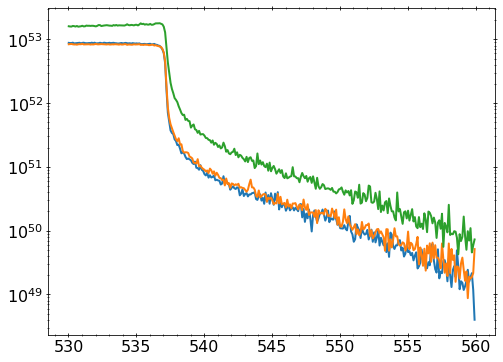

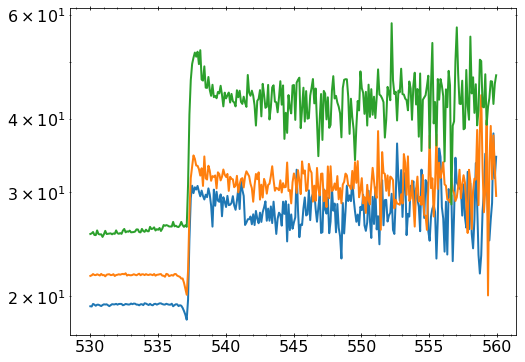

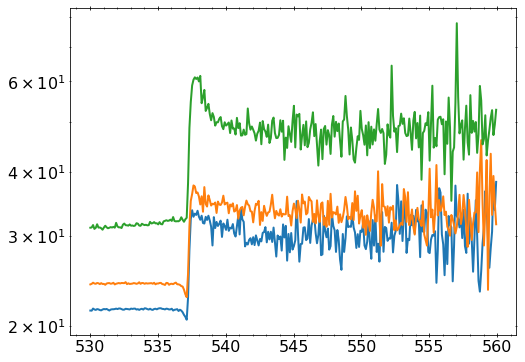

In [7]:
for i in range(3):
    plt.plot(SG_times,SG_data[0,i,:])
    plt.plot(SG_times,SG_data[1,i,:])
    plt.plot(SG_times,SG_data[2,i,:])
    plt.yscale('log')
    plt.show()

In [8]:
outfile = open("s40_atBH_10km.dat",'w')
outfile.write("#tbounce=0\n")
for i in range(300):
    outfile.write(str(SG_times[i]/1000.)+" "+str(SG_data[0,0,i])+" "+str(SG_data[1,0,i])+" "+str(SG_data[2,0,i])+" "+str(SG_data[0,1,i])+" "+str(SG_data[1,1,i])+" "+str(SG_data[2,1,i])+" "+str(SG_data[0,2,i])+" "+str(SG_data[1,2,i])+" "+str(SG_data[2,2,i])+"\n")
outfile.close()